# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Shafa Kamila]
- **Email:** [shaff.kamila@gmail.com]
- **ID Dicoding:** [shafa_kamila]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dan musim mempengaruhi jumlah penyewaan sepeda harian pada tahun 2012 di sistem Bike Sharing Capital Bikeshare?
- Apakah ada peningkatan penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan selama musim panas 2011?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [3]:
#memuat data day.csv
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#memuat data hour.csv
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


In [6]:
hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


**Insight:**
- tipe data untuk dteday masih berupa object(string) sehingga perlu diubah menjadi datetime
*   tidak ada data yang kosong
*   tidak ada data yang terduplikasi



### Cleaning Data

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- data sudah bersih dan siap digunakan


## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Penyewaan berdasarkan musim (diurutkan berdasarkan rata-rata penyewaan):
   season  avg_rentals  total_rentals
2       3  6824.244681         641479
1       2  6209.489130         571273
3       4  5791.865169         515476
0       1  3531.296703         321348


Penyewaan berdasarkan kondisi cuaca buruk (diurutkan berdasarkan rata-rata penyewaan):
        weathersit  avg_rentals  total_rentals
0            Clear  6003.734177        1422885
2    Mist + Cloudy  4991.333333         613934
1  Light Rain/Snow  2126.166667          12757


Matriks Korelasi antara Variabel Hum, Temp, Wind Speed dan Penyewaan Sepeda
               temp       hum  windspeed       cnt
temp       1.000000  0.118262  -0.203691  0.713793
hum        0.118262  1.000000  -0.291031 -0.088861
windspeed -0.203691 -0.291031   1.000000 -0.279008
cnt        0.713793 -0.088861  -0.279008  1.000000


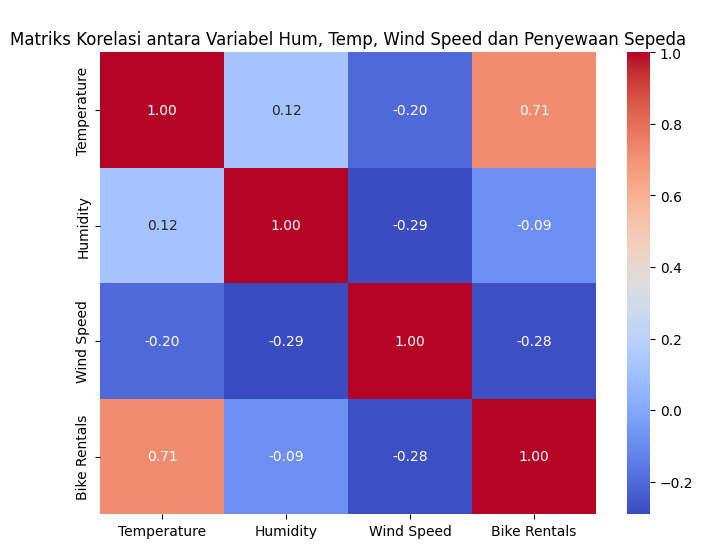

In [27]:
# Filter data untuk tahun 2012
day_df_2012 = day_df[day_df['yr'] == 1]  # 1: 2012
# Mengelompokkan berdasarkan musim dan menghitung rata-rata dan total penyewaan
seasonal_rentals = day_df_2012.groupby('season').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengelompokkan berdasarkan kondisi cuaca buruk dan menghitung rata-rata dan total penyewaan
weather_rentals = day_df_2012.groupby('weathersit').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengurutkan hasil berdasarkan rata-rata penyewaan
seasonal_rentals_sorted = seasonal_rentals.sort_values(by='avg_rentals', ascending=False)
weather_rentals_sorted = weather_rentals.sort_values(by='avg_rentals', ascending=False)

# Menampilkan hasil
print("Penyewaan berdasarkan musim (diurutkan berdasarkan rata-rata penyewaan):")
print(seasonal_rentals_sorted)

print("\n\nPenyewaan berdasarkan kondisi cuaca buruk (diurutkan berdasarkan rata-rata penyewaan):")
print(weather_rentals_sorted)

# Korelasi antara variabel cuaca (suhu, kelembaban, kecepatan angin) dengan penyewaan sepeda
correlation_matrix = day_df_2012[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Menampilkan matriks korelasi
print("\n\nMatriks Korelasi antara Variabel Hum, Temp, Wind Speed dan Penyewaan Sepeda")
print(correlation_matrix)

# Membuat visualisasi heatmap dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=['Temperature', 'Humidity', 'Wind Speed', 'Bike Rentals'],
            yticklabels=['Temperature', 'Humidity', 'Wind Speed', 'Bike Rentals'])

plt.title('\nMatriks Korelasi antara Variabel Hum, Temp, Wind Speed dan Penyewaan Sepeda')
plt.show()



**1. Pengaruh Musim Terhadap Penyewaan Sepeda:**
*  Musim Gugur (Fall) memiliki rata-rata penyewaan tertinggi (6824 penyewaan per hari) dengan total 641.479 penyewaan selama musim tersebut. Ini menunjukkan bahwa musim gugur adalah waktu paling populer untuk penyewaan sepeda.
*   Musim Panas (Summer) berada di peringkat kedua dengan rata-rata penyewaan 6209 per hari dan total 571.273 penyewaan.
*   Musim Dingin (Winter) adalah yang paling rendah, dengan rata-rata penyewaan hanya 3531 per hari dan total penyewaan 321.348. Ini wajar karena cuaca dingin membuat orang cenderung menghindari aktivitas luar ruangan seperti bersepeda.

**Insight:** Secara keseluruhan, penyewaan sepeda lebih tinggi di musim-musim yang lebih hangat (gugur dan musim panas), dan menurun drastis di musim dingin, yang mungkin terkait dengan suhu dingin dan kondisi cuaca yang kurang mendukung.

**2. Pengaruh Cuaca Terhadap Penyewaan Sepeda:**

*  Cuaca cerah atau berawan ringan (Weathersit 1) memiliki rata-rata penyewaan tertinggi, dengan 6003 penyewaan per hari dan total penyewaan 1.422.885.
*   Cuaca berkabut atau mendung (Weathersit 2) memiliki rata-rata lebih rendah, dengan 4991 penyewaan per hari dan total 613.934.
*   Cuaca buruk seperti hujan ringan atau salju ringan (Weathersit 3) memiliki rata-rata penyewaan terendah, hanya 2126 penyewaan per hari dan total 12.757.

**Insight**: Penyewaan sepeda jauh lebih tinggi saat cuaca cerah atau hanya sedikit berawan. Cuaca mendung atau berkabut cenderung mengurangi jumlah penyewaan, dan cuaca buruk seperti hujan ringan atau salju membuat penyewaan sepeda turun drastis. Ini menunjukkan bahwa kondisi cuaca yang baik sangat penting untuk meningkatkan jumlah penyewaan sepeda.


**3. Korelasi antara Variabel Cuaca dan Penyewaan Sepeda**

*  Korelasi antara suhu (temp) dan penyewaan sepeda (cnt) sebesar 0.713.Ini menunjukkan hubungan positif yang cukup kuat antara suhu dan penyewaan sepeda.
*  Korelasi antara kelembaban (hum) dan penyewaan sepeda (cnt) sebesar -0.088. Ini adalah korelasi negatif yang lemah.
*  Korelasi antara kecepatan angin (windspeed) dan penyewaan sepeda (cnt) sebesar -0.279. ini adalah korelasi negatif yang sangat lemah

**Insight**: Suhu memiliki dampak terbesar terhadap jumlah penyewaan sepeda. Semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.
Kelembaban dan kecepatan angin memiliki dampak yang lebih kecil dan negatif, tetapi pengaruhnya tidak sebesar suhu.

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [34]:
# Filter data untuk musim panas 2011 (Juni, Juli, Agustus)
summer_months = [6, 7, 8]  # bulan Juni, Juli, dan Agustus
hour_df_summer_2011 = hour_df[(hour_df['yr'] == 0) & (hour_df['mnth'].isin(summer_months))]

# Buat kolom untuk menandakan hari kerja atau akhir pekan
hour_df_summer_2011['is_weekend'] = hour_df_summer_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Menghitung rata-rata penyewaan berdasarkan hari kerja dan akhir pekan
rentals_by_day_type = hour_df_summer_2011.groupby('is_weekend').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengganti nilai is_weekend dengan label
rentals_by_day_type['is_weekend'] = rentals_by_day_type['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Menampilkan hasil perhitungan
print(rentals_by_day_type)

# Menghitung rata-rata penyewaan per jam
hourly_rentals = hour_df_summer_2011.groupby(['hr', 'is_weekend']).agg(avg_rentals=('cnt', 'mean')).reset_index()

# Menampilkan hasil perhitungan
print(hourly_rentals)

    is_weekend  avg_rentals  total_rentals
0   Hari Kerja   191.208624         301536
1  Akhir Pekan   194.187702         120008
    hr  is_weekend  avg_rentals
0    0           0    52.476923
1    0           1    87.230769
2    1           0    31.923077
3    1           1    50.230769
4    2           0    20.553846
5    2           1    37.923077
6    3           0    10.923077
7    3           1    19.038462
8    4           0     6.553846
9    4           1     8.692308
10   5           0    21.338462
11   5           1    17.230769
12   6           0    92.046154
13   6           1    63.846154
14   7           0   247.590909
15   7           1   160.307692
16   8           0   359.484848
17   8           1   284.538462
18   9           0   198.257576
19   9           1   209.730769
20  10           0   149.833333
21  10           1   206.423077
22  11           0   181.030303
23  11           1   244.769231
24  12           0   220.500000
25  12           1   285.500000
26  13 

<ipython-input-34-a1e1b60793ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_summer_2011['is_weekend'] = hour_df_summer_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)


Hari Kerja: Rata-rata penyewaan sepeda

**1.   Rata-Rata penyewaan**

*   pada hari kerja adalah 191.21 unit. Ini menunjukkan bahwa pada hari kerja, sepeda sering digunakan, mungkin karena orang-orang menggunakan sepeda sebagai moda transportasi untuk pergi bekerja atau ke sekolah.

*   Akhir Pekan: Rata-rata penyewaan sepeda pada akhir pekan adalah 194.19 unit. Ini menunjukkan bahwa penyewaan sepeda sedikit lebih tinggi di akhir pekan dibandingkan dengan hari kerja.


**2.   Total Penyewaan**

*   Hari Kerja: Total penyewaan untuk hari kerja mencapai 301,536 unit. Angka ini menunjukkan seberapa besar penggunaan sepeda pada hari kerja selama musim panas 2011.
*   Akhir Pekan: Total penyewaan untuk akhir pekan mencapai 120,008 unit. Meskipun rata-rata penyewaan sedikit lebih tinggi di akhir pekan, totalnya lebih rendah dibandingkan dengan hari kerja karena jumlah hari kerja yang lebih banyak dalam periode yang sama.

**3.  Penyewaan Per Jam**

*   Hari Kerja (is_weekend = 0): Puncak penyewaan terjadi pada jam 17, dengan jumlah penyewaan tertinggi sebesar 490,02 penyewaan.
*   Akhir Pekan (is_weekend = 1): Puncak penyewaan juga terjadi pada jam 17, namun jumlahnya lebih rendah dibandingkan hari kerja, yaitu 395,31 penyewaan.

**Insight:**

*   Rata-rata penyewaan sepeda pada akhir pekan sedikit lebih tinggi, tetapi total penyewaan pada hari kerja jauh lebih besar. Hal ini menunjukkan bahwa meskipun ada kecenderungan untuk lebih banyak menyewa sepeda pada akhir pekan, penggunaan sepeda secara keseluruhan tetap lebih tinggi pada hari kerja.

*   Data ini bisa menunjukkan bahwa sepeda lebih banyak digunakan untuk perjalanan rutin (seperti pergi bekerja) daripada untuk rekreasi, yang biasanya terjadi di akhir pekan.

*   Hari kerja dan weekend menunjukkan aktivitas penyewaan tertinggi di sore hari, terutama pada jam 17.Akhir pekan memiliki aktivitas tinggi lebih konsisten di siang hingga sore hari.Aktivitas penyewaan rendah baik pada hari kerja maupun akhir pekan terjadi pada dini hari dan pagi hari sebelum jam 7.








## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-25-27138a6f2ae6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='avg_rentals', data=seasonal_rentals_sorted, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

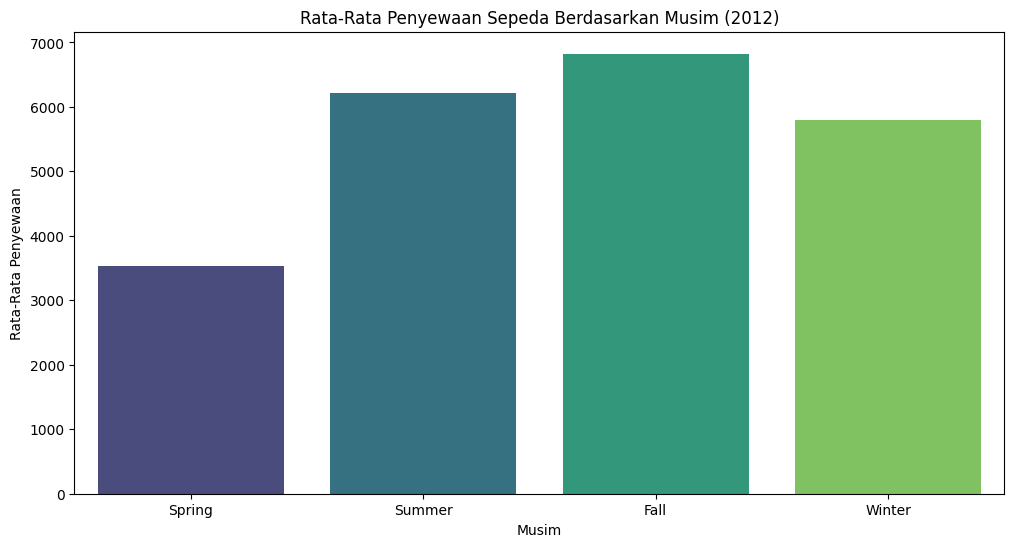

<ipython-input-25-27138a6f2ae6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='avg_rentals', data=weather_rentals_sorted, palette='Set2')  # Mengganti palet warna
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

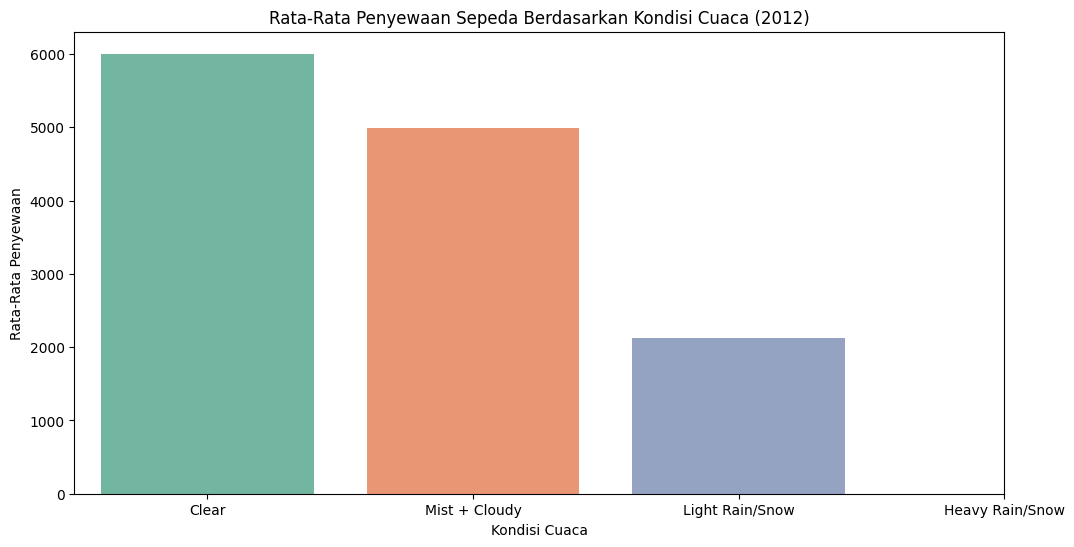

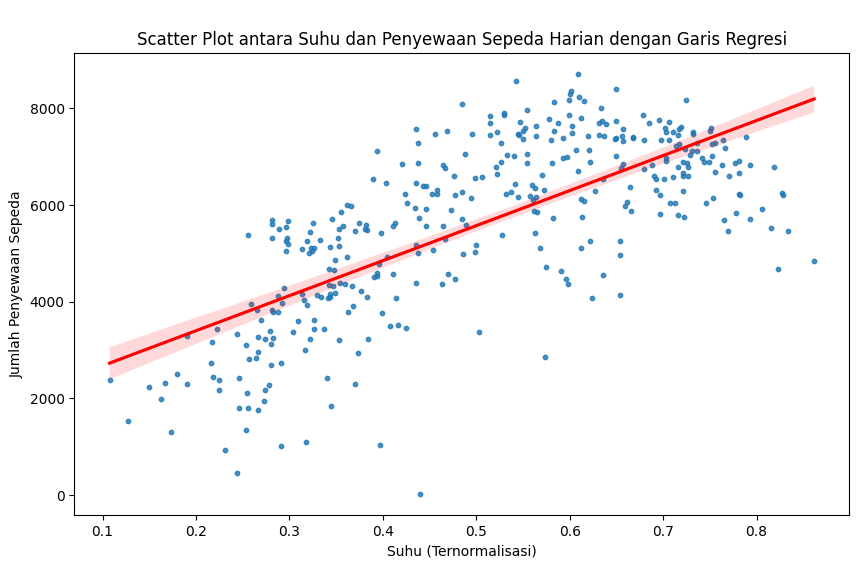

In [25]:
# Visualisasi Rata-Rata Penyewaan Berdasarkan Musim
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='avg_rentals', data=seasonal_rentals_sorted, palette='viridis')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Musim (2012)')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi Rata-Rata Penyewaan Berdasarkan Kondisi Cuaca
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='avg_rentals', data=weather_rentals_sorted, palette='Set2')  # Mengganti palet warna
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2012)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist + Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

# Visualisasi scatter plot antara suhu dan penyewaan sepeda dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=day_df_2012, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('\nScatter Plot antara Suhu dan Penyewaan Sepeda Harian dengan Garis Regresi')
plt.xlabel('Suhu (Ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

<ipython-input-37-e7b3c89f8b6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='avg_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


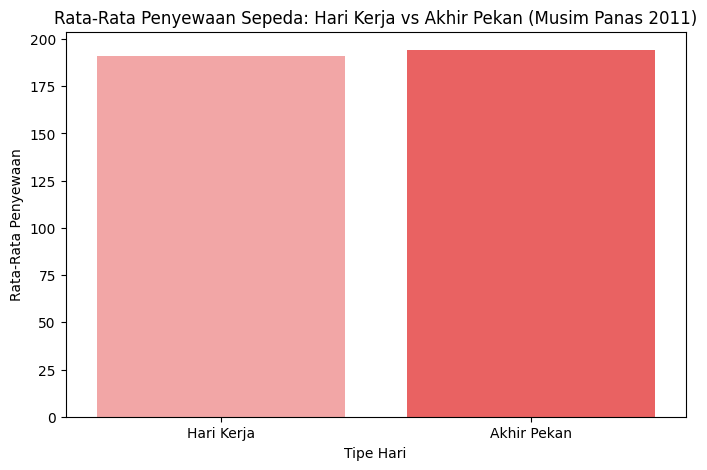

<ipython-input-37-e7b3c89f8b6b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='total_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


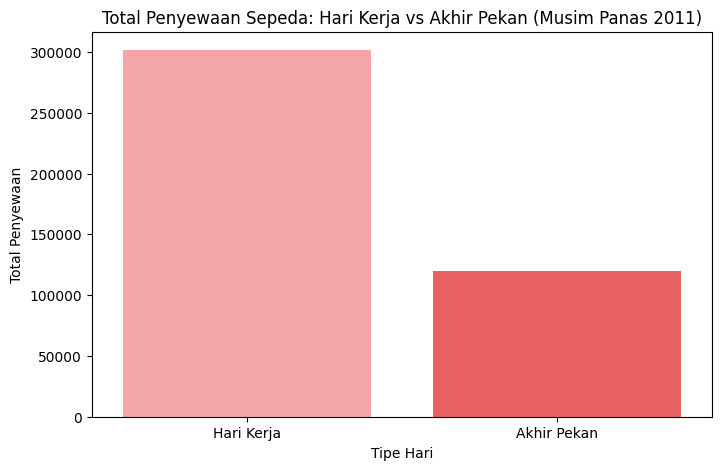

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


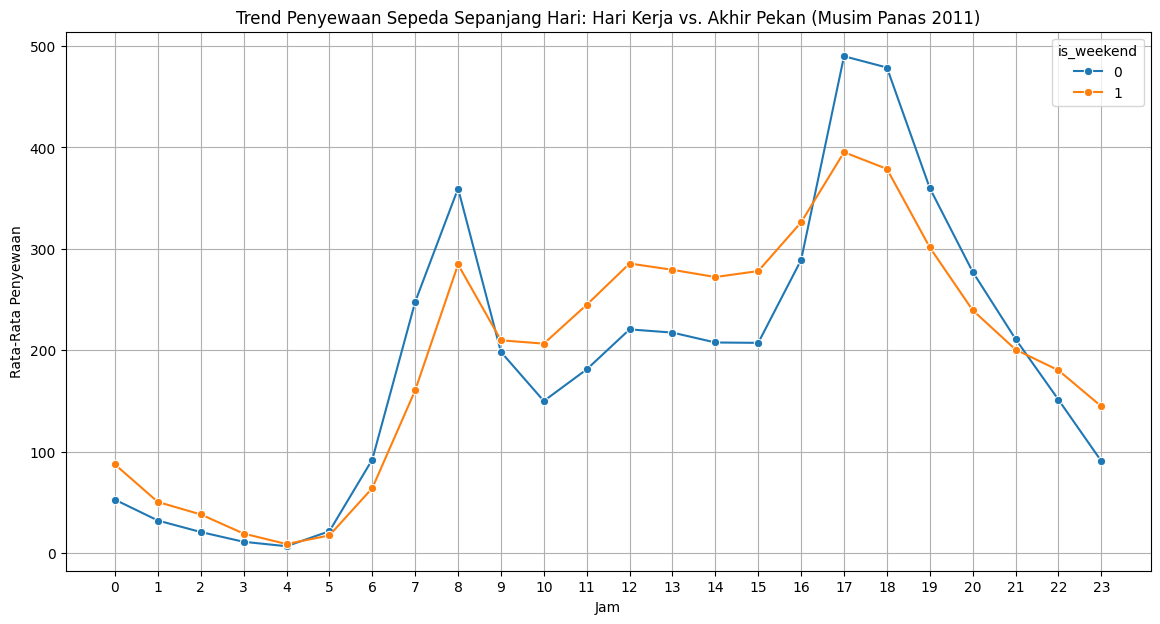

In [37]:
# Visualisasi Rata-Rata Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='avg_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])
plt.title('Rata-Rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (Musim Panas 2011)')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=0)
plt.show()

# Visualisasi Total Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='total_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])
plt.title('Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (Musim Panas 2011)')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.show()

# Visualisasi Trend Penyewaan Sepeda Sepanjang Hari: Hari Kerja vs. Akhir Pekan
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_rentals, x='hr', y='avg_rentals', hue='is_weekend', marker='o')
plt.title('Trend Penyewaan Sepeda Sepanjang Hari: Hari Kerja vs. Akhir Pekan (Musim Panas 2011)')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


## Conclusion

**- Conclution pertanyaan 1**
Analisis menunjukkan bahwa cuaca dan musim memiliki dampak signifikan terhadap jumlah penyewaan sepeda di Capital Bikeshare selama tahun 2012. Dari data yang diperoleh, musim panas mencatatkan rata-rata penyewaan tertinggi dibandingkan dengan musim lainnya, mencerminkan meningkatnya aktivitas luar ruangan dan minat masyarakat untuk menggunakan sepeda sebagai moda transportasi. Selain itu, kondisi cuaca cerah turut berkontribusi pada peningkatan penyewaan, sedangkan cuaca buruk seperti hujan atau salju menyebabkan penurunan jumlah penyewaan secara signifikan. Suhu terbukti sebagai faktor yang paling berkorelasi positif dengan penyewaan sepeda, di mana semakin hangat cuaca, semakin tinggi kemungkinan orang menyewa sepeda. Temuan ini menegaskan pentingnya memperhitungkan faktor cuaca dan musim dalam perencanaan operasional serta strategi pemasaran guna meningkatkan penggunaan sepeda dalam sistem berbagi sepeda.


**- Conclution pertanyaan 2**
Dalam analisis ini, menunjukkan bahwa rata-rata penyewaan sepeda pada hari kerja adalah 191,21 unit, sedangkan pada akhir pekan sedikit lebih tinggi, yaitu 194,19 unit. Meskipun demikian, total penyewaan sepeda pada hari kerja mencapai 301.536 unit, jauh lebih besar dibandingkan dengan total penyewaan akhir pekan yang hanya 120.008 unit. Ini mengindikasikan bahwa penggunaan sepeda lebih sering terkait dengan kegiatan rutin seperti perjalanan ke tempat kerja atau sekolah, sementara akhir pekan cenderung digunakan untuk aktivitas rekreasi. Puncak penyewaan terjadi pada jam 17.00 baik di hari kerja maupun akhir pekan, meskipun jumlahnya lebih tinggi pada hari kerja dengan 490,02 penyewaan dibandingkan 395,31 penyewaan di akhir pekan. Selain itu, aktivitas penyewaan rendah terjadi pada dini hari dan pagi hari sebelum jam 7, menunjukkan bahwa waktu sewa lebih condong pada sore hari. Temuan ini menekankan pentingnya memahami pola penyewaan sepeda untuk merancang strategi yang lebih efektif dalam mempromosikan penggunaan sepeda sebagai moda transportasi.